# **Imports**
First of all, we import all the libraries and functions that we will use throughout the notebook.

In [41]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical

# **Data loading**

In [42]:
test = np.genfromtxt('data/train.csv', delimiter = ',', skip_header = 1)
print("Total samples:", test.shape)
X = test[:, 1:]
Y = test[:, 0]
n = X.shape[0]
m = X.shape[1]

print (n)
print (m)

Total samples: (42000, 785)
42000
784


# **Data display**

Let's see some randomly selected images from the dataset.

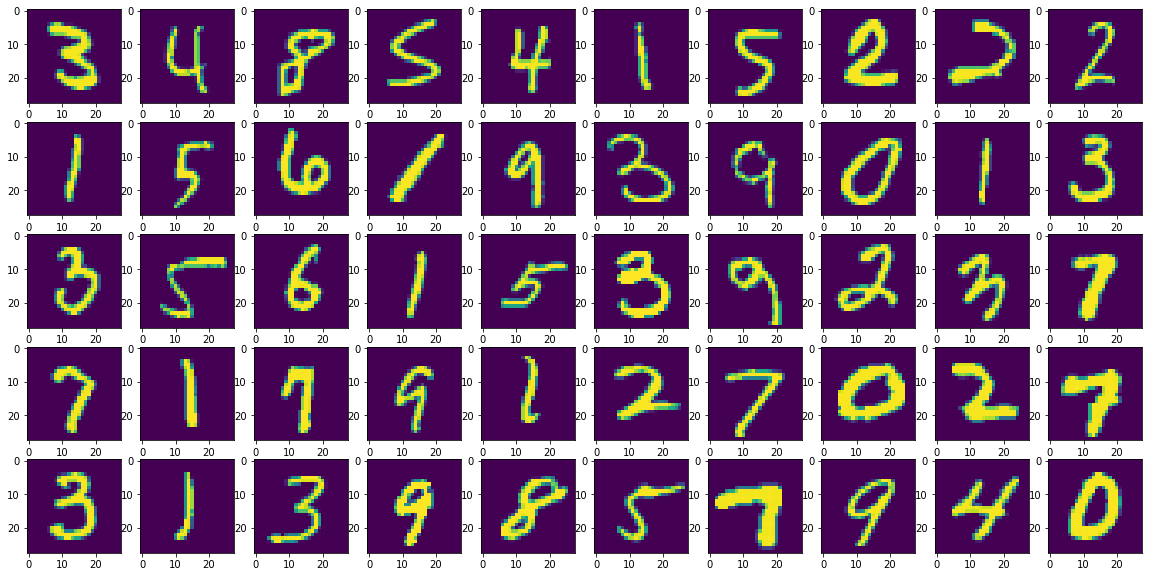

In [43]:
index = np.random.randint(0, n, 50)
plt.figure(figsize = (20, 10))
for i, idx in enumerate(index):
    plt.subplot(5, 10, i+1)
    plt.imshow(np.reshape(X[idx,:], ((28, 28))))
plt.show()

We show the number of examples of each label. As you can see the training data is balanced.

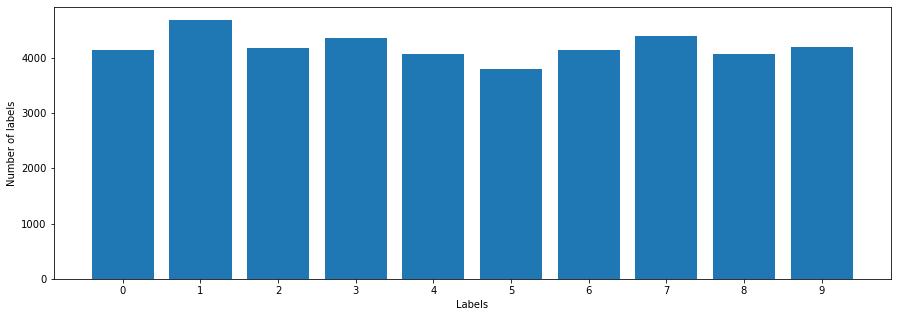

In [44]:
x_labels = sorted(list(set(Y)))
y_labels = [Y.tolist().count(i) for i in x_labels]

plt.figure(figsize = (15,5))
plt.ylabel('Number of labels')
plt.xlabel('Labels')
plt.xticks([i for i in range(len(x_labels))]) 
plt.bar(x_labels, y_labels)
plt.show()

# **Data preprocessing**

In order to train the model it is necessary to normalize the test data.

In [45]:
X = X / 255

# **Division of data into train and test**

Since we are facing a classification problem with multiple classes, we will transform the output $Y$ class following a one-hot encoding.

In [46]:
Y = to_categorical(Y)

Let's show some random example to check that everything is correct.

Output associated to the label:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


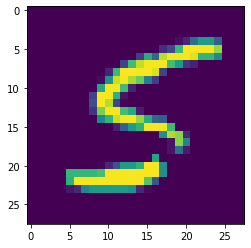

In [47]:
sample = np.random.choice(X.shape[0])
plt.imshow(np.reshape(X[sample, :], ((28, 28))))
print("Output associated to the label: ", Y[sample])

We will use $80\%$ of the data for training and the remaining $20\%$ for testing. To choose them randomly we will use a random shuffle.

In [48]:
random.seed(1)
indexs = np.arange(n)
random.shuffle (indexs)
position = int(n * 0.8)

X_train = X[indexs[:position]]
Y_train = Y[indexs[:position]]

X_test  = X[indexs[position:]]
Y_test  = Y[indexs[position:]]

print("Number of examples for training: ", X_train.shape[0])
print("Number of examples for testing: ", X_test.shape[0])

Number of examples for training:  33600
Number of examples for testing:  8400


# **Model training**